<a href="https://colab.research.google.com/github/husnulAbid/Tensorflow-in-Practice-Specialization/blob/master/Course_2_Ex_4_Hand_Gesture_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from os import getcwd

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [ ]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test (1).csv
Saving sign_mnist_train.csv to sign_mnist_train (1).csv


In [ ]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data1 = row[1:]
            data =np.asarray(data1)
            
            #some image has less pixel that's why

            if len(data) < 784:
              p =1
            else:
              img = np.array(data).reshape((28, 28))
            

              imgs.append(img)
              labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
        
    return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)
#some image has less pixel that's why

(23933, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])


model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

# Train the Model

history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
748/747 [==============================] - 46s 62ms/step - loss: 2.8490 - acc: 0.1416 - val_loss: 1.9909 - val_acc: 0.3864
Epoch 2/15
748/747 [==============================] - 44s 58ms/step - loss: 2.1897 - acc: 0.3222 - val_loss: 1.7079 - val_acc: 0.4050
Epoch 3/15
748/747 [==============================] - 44s 59ms/step - loss: 1.7627 - acc: 0.4423 - val_loss: 1.0644 - val_acc: 0.6440
Epoch 4/15
748/747 [==============================] - 44s 58ms/step - loss: 1.4699 - acc: 0.5291 - val_loss: 0.8523 - val_acc: 0.7161
Epoch 5/15
748/747 [==============================] - 44s 58ms/step - loss: 1.2608 - acc: 0.5948 - val_loss: 0.6165 - val_acc: 0.7808
Epoch 6/15
748/747 [==============================] - 44s 59ms/step - loss: 1.1074 - acc: 0.6440 - val_loss: 0.4836 - val_acc: 0.8345
Epoch 7/15
748/747 [==============================] - 44s 58ms/step - loss: 0.9881 - acc: 0.6807 - val_loss: 0.4750 - va

[6.92426086682151, 0.56609035]

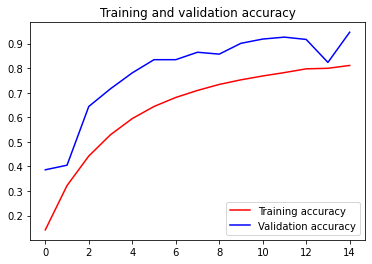

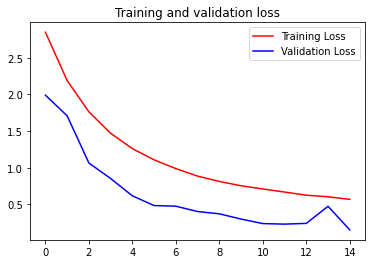

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()